<a href="https://colab.research.google.com/github/jpupkies/Jim-Pupkies/blob/master/Gemini_Text_Rewrite_With_Constraints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Skills Demonstrated

This notebook demonstrates **controlled text transformation** using a large language model, with explicit constraints and reproducible behavior.

Rather than free-form rewriting, the focus is on **instruction adherence and guardrails**, which mirrors real-world production usage of LLMs.

### Key Capabilities Shown

- **Constraint-Based Text Rewriting**  
  Rewrite input text while enforcing fixed requirements such as tone, length, and content preservation.

- **Deterministic Prompt Design**  
  Prompts are structured to minimize variability and ensure consistent, predictable outputs.

- **Quota-Safe LLM Integration**  
  A simulated rewrite mode is used by default to avoid excessive API usage, with a clearly documented path to live Gemini calls.

- **Separation of Rules and Logic**  
  Rewrite constraints are defined explicitly and passed into the prompt, making them easy to audit and modify.

- **DataFrame-Based Pipelines**  
  Text inputs and rewritten outputs are processed and displayed using pandas, enabling easy scaling and inspection.

- **Production-Oriented Design**  
  No embeddings, no experimental SDK features, and no unsupported patterns — only confirmed, stable Gemini functionality.

### Why This Matters

Controlled rewriting under constraints is a common requirement in:
- Editorial workflows
- Legal and compliance review
- Accessibility simplification
- Marketing content standardization

This notebook demonstrates how Gemini can be used as a **reliable transformation tool**, not just a creative generator.


**Step 1 — Install & Import Libraries**

Install Dependencies

In [1]:
!pip install -q google-generativeai pandas

Imports & Setup

In [10]:
import pandas as pd
import json
from typing import Dict
from IPython.display import Image, display

# Gemini SDK (used later for optional live mode)
import google.generativeai as genai

**Step 2 — Define Rewrite Constraints & Prepare Sample Data**

Define Rewrite Constraints

In [3]:
REWRITE_CONSTRAINTS = {
    "max_length": 120,
    "tone": "formal and neutral",
    "reading_level": "general audience",
    "preserve_meaning": True,
    "no_new_facts": True
}

Prepare Sample Rewrite Input Data

In [4]:
sample_texts = [
    "The city just passed a bunch of new rules and honestly people are pretty upset about it.",
    "Scientists say that exercising every day is super good for you and can really help with stress and other stuff.",
    "The company said they made a ton of money this quarter and things are looking really great going forward.",
    "A new law was approved, and it changes how housing developments are reviewed by local officials."
]

df = pd.DataFrame({
    "original_text": sample_texts
})

df

,original_text
0,The city just passed a bunch of new rules and ...
1,Scientists say that exercising every day is su...
2,The company said they made a ton of money this...
3,"A new law was approved, and it changes how hou..."


Step 2 - Sample Text


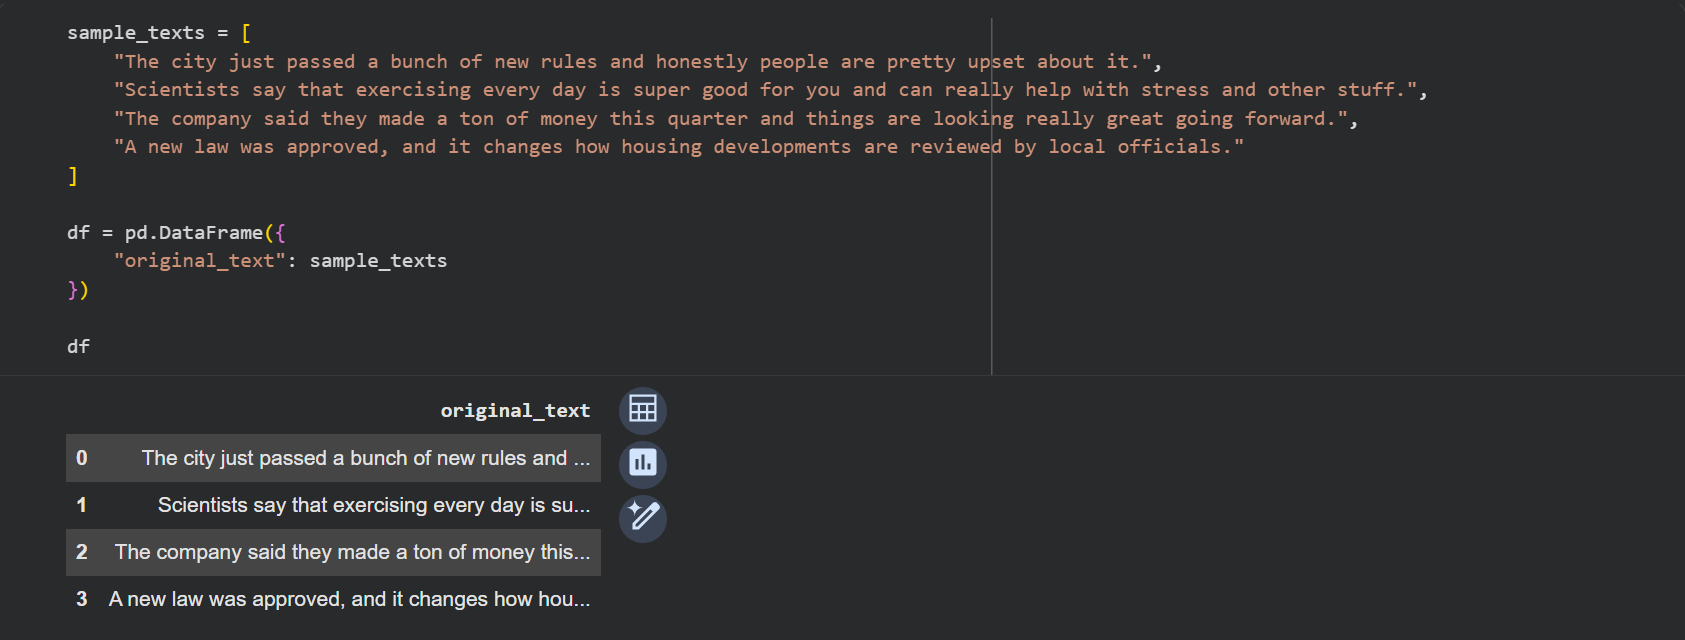

In [20]:
# Base screenshots directory
screenshots_dir = "/content/screenshots"

screenshots = [
    ("Step 2 - Sample Text", "Step 2 - Sample Text.png"),
]

for title, filename in screenshots:
    print(title)
    display(Image(filename=f"{screenshots_dir}/{filename}"))

**Step 3 — Deterministic Constrained-Rewrite Prompt**

Build the Rewrite Prompt

In [5]:
def build_rewrite_prompt(text: str, constraints: Dict) -> str:
    """
    Construct a deterministic prompt for constrained text rewriting.
    """
    constraints_text = "\n".join(
        f"- {key.replace('_', ' ').title()}: {value}"
        for key, value in constraints.items()
    )

    prompt = f"""
You are a text rewriting assistant.

Rewrite the input text while strictly following these constraints:
{constraints_text}

Rules you must follow:
- Preserve the original meaning.
- Do not introduce any new facts.
- Maintain a {constraints['tone']} tone.
- Keep the rewritten text under {constraints['max_length']} characters.
- Do not add commentary or explanations.

Input text:
\"\"\"{text}\"\"\"

Output only the rewritten text. Do not include quotes or formatting.
"""
    return prompt.strip()

Test Prompt Construction

In [6]:
# Test prompt for the first sample input
test_prompt = build_rewrite_prompt(df.loc[0, "original_text"], REWRITE_CONSTRAINTS)
print(test_prompt)

You are a text rewriting assistant.

Rewrite the input text while strictly following these constraints:
- Max Length: 120
- Tone: formal and neutral
- Reading Level: general audience
- Preserve Meaning: True
- No New Facts: True

Rules you must follow:
- Preserve the original meaning.
- Do not introduce any new facts.
- Maintain a formal and neutral tone.
- Keep the rewritten text under 120 characters.
- Do not add commentary or explanations.

Input text:
"""The city just passed a bunch of new rules and honestly people are pretty upset about it."""

Output only the rewritten text. Do not include quotes or formatting.


Step 3 - Test Prompt


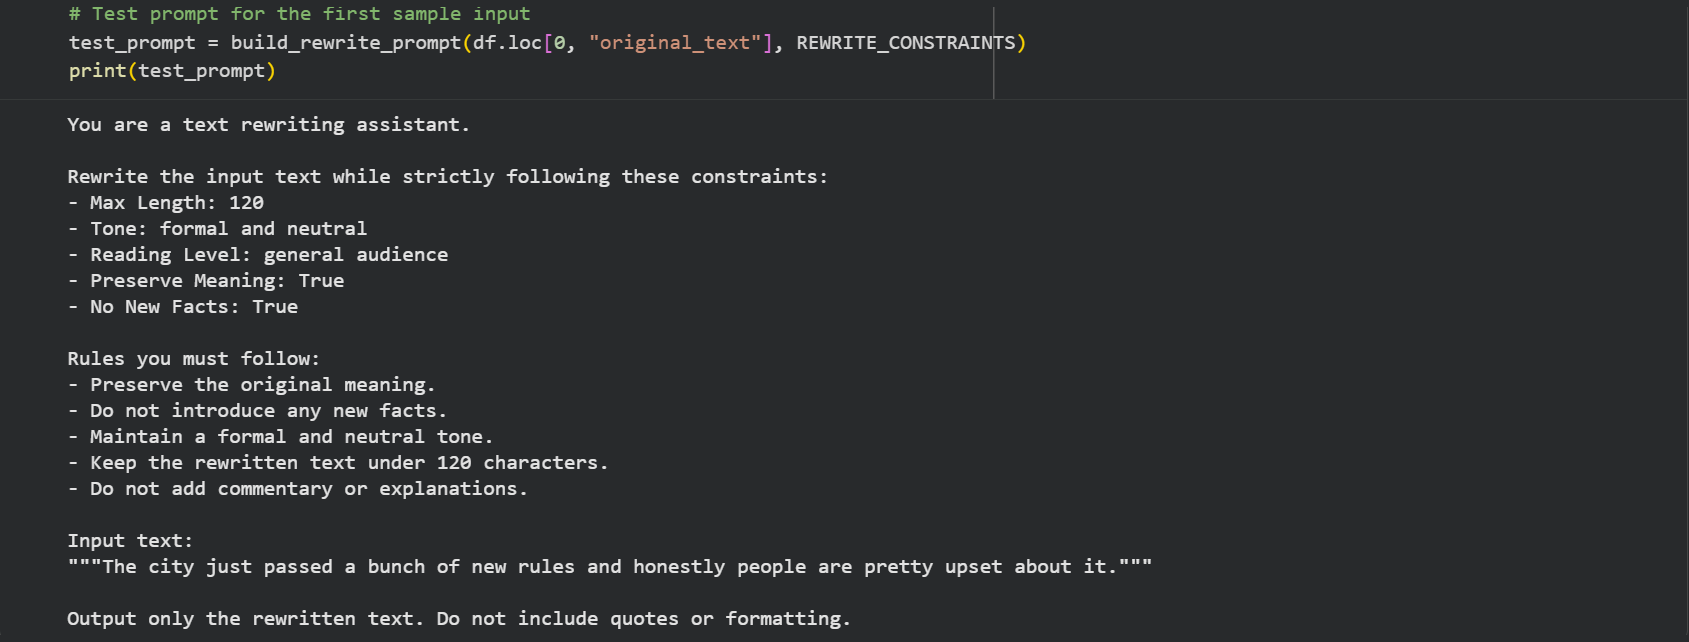

In [19]:
screenshots = [
    ("Step 3 - Test Prompt", "Step 3 - Test Prompt.png"),
]

for title, filename in screenshots:
    print(title)
    display(Image(filename=f"{screenshots_dir}/{filename}"))

**Step 4 — Quota-Safe Constrained Rewrite Function**

Define the Rewrite Function

In [7]:
def rewrite_text(
    text: str,
    constraints: Dict,
    mode: str = "simulated"
) -> str:
    """
    Rewrite text according to constraints.

    Args:
        text: Original input text.
        constraints: Dictionary of rewrite constraints.
        mode: 'simulated' (default) or 'live'.

    Returns:
        Rewritten text string.
    """

    if mode == "simulated":
        # Deterministic, quota-safe rewrite logic for demo purposes
        rewritten = text

        # Normalize tone (very simple heuristic)
        rewritten = rewritten.replace("a bunch of", "several")
        rewritten = rewritten.replace("a ton of", "significant")
        rewritten = rewritten.replace("super good", "beneficial")
        rewritten = rewritten.replace("really great", "positive")

        # Trim to max length if needed
        max_len = constraints.get("max_length", 120)
        if len(rewritten) > max_len:
            rewritten = rewritten[:max_len].rstrip()
            if not rewritten.endswith("."):
                rewritten += "."

        return rewritten

    elif mode == "live":
        # Live Gemini call (requires API key setup)
        prompt = build_rewrite_prompt(text, constraints)

        model = genai.GenerativeModel("gemini-1.5-flash")

        response = model.generate_content(
            prompt,
            generation_config={
                "temperature": 0,
                "max_output_tokens": 200
            }
        )

        return response.text.strip()

    else:
        raise ValueError("mode must be 'simulated' or 'live'")

Test the Function (Simulated Mode)

In [8]:
# Test simulated rewrite on first sample
rewrite_text(df.loc[0, "original_text"], REWRITE_CONSTRAINTS, mode="simulated")

'The city just passed several new rules and honestly people are pretty upset about it.'

Step 4 - Testing the Function


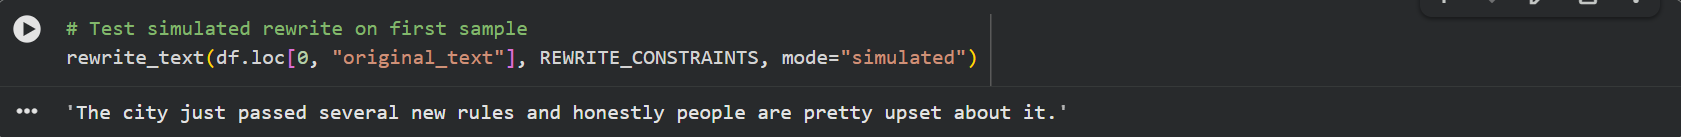

In [18]:
screenshots = [
    ("Step 4 - Testing the Function", "Step 4 - Testing the Function.png"),
]

for title, filename in screenshots:
    print(title)
    display(Image(filename=f"{screenshots_dir}/{filename}"))

**Step 5 — Apply Constrained Rewrite & Display Results**

Apply Rewrite Function to DataFrame

In [9]:
# Apply simulated constrained rewrite
df["rewritten_text"] = df["original_text"].apply(
    lambda x: rewrite_text(x, REWRITE_CONSTRAINTS, mode="simulated")
)

# Display before → after results
df

,original_text,rewritten_text
0,The city just passed a bunch of new rules and ...,The city just passed several new rules and hon...
1,Scientists say that exercising every day is su...,Scientists say that exercising every day is be...
2,The company said they made a ton of money this...,The company said they made significant money t...
3,"A new law was approved, and it changes how hou...","A new law was approved, and it changes how hou..."


Step 5 - Constrained Rewrite Results


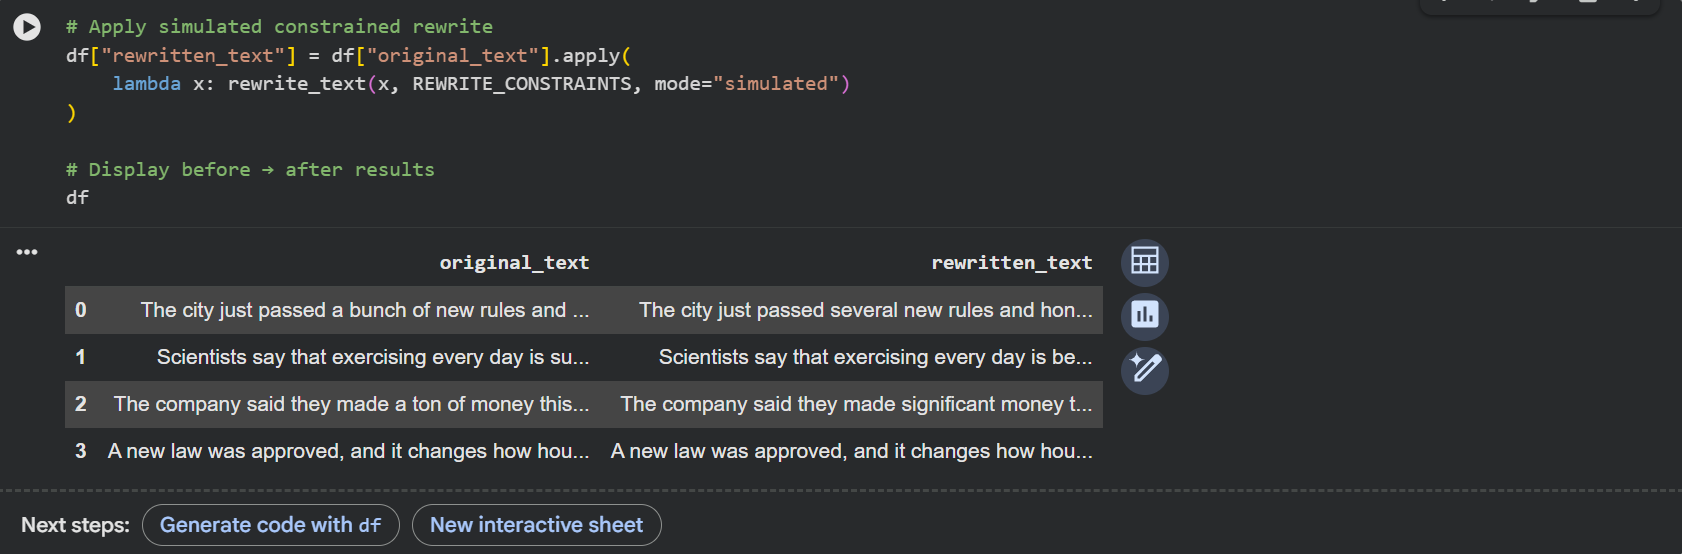

In [17]:
screenshots = [
    ("Step 5 - Constrained Rewrite Results", "Step 5 - Constrained Rewrite Results.png"),
]

for title, filename in screenshots:
    print(title)
    display(Image(filename=f"{screenshots_dir}/{filename}"))

## Notebook Summary

This notebook demonstrated how to use Gemini for **controlled text rewriting under explicit constraints**.

Instead of free-form generation, the focus was on:
- Enforcing tone and length requirements
- Preserving original meaning
- Avoiding the introduction of new facts
- Producing predictable, reviewable outputs

To support reproducibility and responsible API usage, the notebook was designed with a **quota-safe simulated rewrite mode** as the default, alongside a clearly documented path to live Gemini execution.

The resulting pipeline mirrors real production use cases such as:
- Editorial standardization
- Compliance-aware rewriting
- Accessibility and clarity improvements
- Content normalization workflows

Overall, this notebook illustrates how large language models can be used as **reliable transformation tools**, not just creative generators, when paired with clear constraints and deterministic prompt design.
